In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# delete rows with no data 
print(df.shape)
print(df.dropna().shape)


(891, 15)
(182, 15)


In [7]:
#delete column 
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


<Axes: xlabel='age', ylabel='Count'>

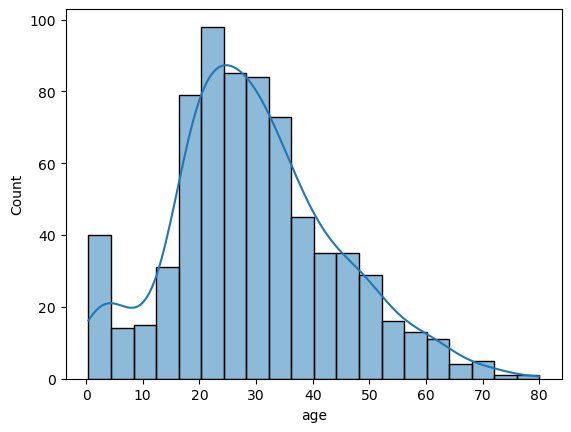

In [10]:
#imputation techniques for missing values

## mean value imputation
sns.histplot(df['age'],kde=True)


In [17]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

<Axes: xlabel='Age_mean', ylabel='Count'>

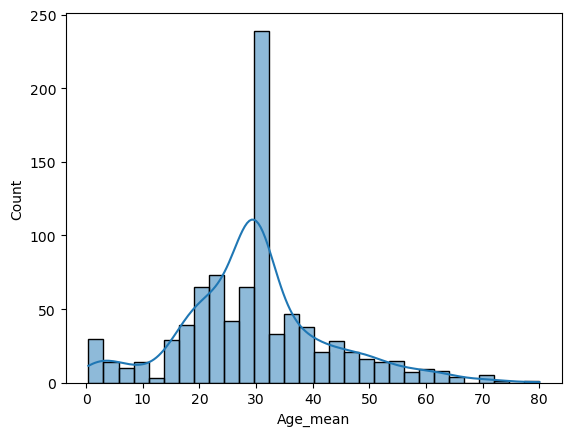

In [19]:
sns.histplot(df['Age_mean'],kde=True)

In [20]:
# median imputation
 
df['age_median'] = df['age'].fillna(df['age'].median())

<Axes: xlabel='age_median', ylabel='Count'>

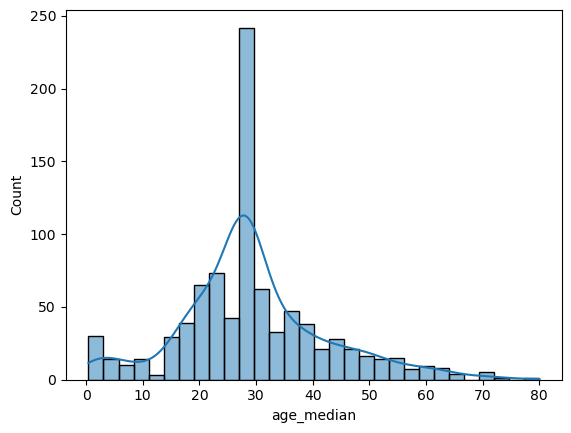

In [21]:
sns.histplot(df['age_median'], kde=True)

In [23]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_median,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,62.0


In [24]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()

In [31]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [32]:
df[['embarked','embarked_mode']]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [33]:
#up sampling and down sampling

import numpy as np
import pandas as pd

np.random.seed(123)

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples - n_class_0

In [34]:
n_class_0,n_class_1

(900, 100)

In [40]:
# create dataset

class_0 = pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

class_1 = pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})




In [41]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [42]:
df.head()

,feature_1,feature_2,target
0,-1.774224,0.285744,0
1,-1.201377,0.333279,0
2,1.096257,0.531807,0
3,0.861037,-0.354766,0
4,-1.520367,-1.120815,0


In [43]:
df.tail()

,feature_1,feature_2,target
995,2.677156,1.092048,1
996,2.963404,0.181955,1
997,1.621476,1.877267,1
998,3.429559,3.794486,1
999,3.532273,1.679490,1


In [44]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [45]:
# upsampling 

df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]


In [47]:
from sklearn.utils import resample
df_minority_unsampled = resample(df_minority,replace=True,n_samples=len(df_majority), random_state=42)

In [48]:
df_minority_unsampled.shape

(900, 3)

In [52]:
df_upsampled = pd.concat([df_minority_unsampled,df_majority])

In [53]:
df_upsampled

,feature_1,feature_2,target
951,2.905343,1.495151,1
992,2.000977,1.814833,1
914,1.927957,2.280911,1
971,2.819483,2.964646,1
960,2.456515,1.833528,1
...,...,...,...
895,-0.896718,2.540514,0
896,0.812571,-0.082706,0
897,0.637361,0.444621,0
898,0.332712,1.896404,0


In [55]:
df_upsampled['target'].value_counts()

target
1    900
0    900
Name: count, dtype: int64

In [56]:
class_0 = pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

class_1 = pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})


In [57]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [58]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority,n_samples=len(df_minority), random_state=42)

In [59]:
df_majority_downsampled.shape

(100, 3)

In [61]:
df_downsampled = pd.concat([df_minority,df_majority_downsampled])

In [63]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64